# Part 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import numpy.linalg as lin

In [2]:
exprs = pd.read_csv('https://raw.githubusercontent.com/cs109/2014_data/master/exprs_GSE5859.csv')
sampleinfo = pd.read_csv('https://raw.githubusercontent.com/cs109/2014_data/master/sampleinfo_GSE5859.csv')

In [11]:
exprs = exprs.set_index('Unnamed: 0')

In [32]:
(exprs.columns == sampleinfo.filename).all()

False

In [37]:
exprs = exprs[list(sampleinfo.filename)]

In [38]:
exprs.head()

,GSM25349.CEL.gz,GSM25350.CEL.gz,GSM25356.CEL.gz,GSM25357.CEL.gz,GSM25358.CEL.gz,GSM25359.CEL.gz,GSM25360.CEL.gz,GSM25361.CEL.gz,GSM25377.CEL.gz,GSM25378.CEL.gz,...,GSM136719.CEL.gz,GSM136720.CEL.gz,GSM136721.CEL.gz,GSM136722.CEL.gz,GSM136723.CEL.gz,GSM136724.CEL.gz,GSM136725.CEL.gz,GSM136726.CEL.gz,GSM136727.CEL.gz,GSM136729.CEL.gz
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1007_s_at,6.627014,6.249807,5.934128,6.145268,6.091270,6.041186,6.050375,6.063847,6.226106,6.358282,...,6.466445,6.533592,6.631492,6.513362,6.440706,6.704324,6.488579,6.809481,6.133068,6.155473
1053_at,6.939184,6.818038,7.047962,7.422477,7.272361,7.128216,6.750719,6.836287,6.738022,7.367895,...,7.032885,7.156344,7.018025,6.973322,6.884738,7.120898,7.517410,7.200596,7.280781,7.111583
117_at,5.113570,5.074096,5.371201,5.266550,5.342047,5.063876,5.315898,5.483652,6.689444,6.482782,...,5.661112,5.127260,5.151840,5.505602,5.687689,4.942651,5.247190,5.237239,5.401876,5.302628
121_at,7.833862,7.780682,7.458197,7.655948,7.546555,7.072670,7.092984,6.954225,7.489785,7.388539,...,7.769734,7.815864,7.683279,7.883231,7.913621,7.834196,7.331864,7.357102,7.607461,7.456453
1255_g_at,3.152269,3.111747,3.018932,3.154545,3.107954,3.224284,3.114241,3.044975,3.304038,2.887919,...,3.257484,3.339234,3.298384,3.150654,3.344501,3.230285,3.175846,3.105092,3.225123,3.090149


In [39]:
sampleinfo.head()

,ethnicity,date,filename,sex
0,CEU,2003-02-04,GSM25349.CEL.gz,M
1,CEU,2003-02-04,GSM25350.CEL.gz,M
2,CEU,2002-12-17,GSM25356.CEL.gz,M
3,CEU,2003-01-30,GSM25357.CEL.gz,M
4,CEU,2003-01-03,GSM25358.CEL.gz,M


In [52]:
Dates = pd.to_datetime(sampleinfo.date)

In [48]:
T = dt.datetime(2002,10,31)

In [58]:
elapsedinDays = []
for i in list(Dates):
    elapsedinDays.append((i-T).days)

In [61]:
sampleinfo['elapsedinDays'] = elapsedinDays

In [158]:
sampleinfo.head()

,ethnicity,date,filename,sex,elapsedinDays
0,CEU,2003-02-04,GSM25349.CEL.gz,M,96
1,CEU,2003-02-04,GSM25350.CEL.gz,M,96
2,CEU,2002-12-17,GSM25356.CEL.gz,M,47
3,CEU,2003-01-30,GSM25357.CEL.gz,M,91
4,CEU,2003-01-03,GSM25358.CEL.gz,M,64


In [159]:
CEUsampleinfo = sampleinfo[sampleinfo.ethnicity == 'CEU']

In [160]:
CEUsampleinfo.head()

,ethnicity,date,filename,sex,elapsedinDays
0,CEU,2003-02-04,GSM25349.CEL.gz,M,96
1,CEU,2003-02-04,GSM25350.CEL.gz,M,96
2,CEU,2002-12-17,GSM25356.CEL.gz,M,47
3,CEU,2003-01-30,GSM25357.CEL.gz,M,91
4,CEU,2003-01-03,GSM25358.CEL.gz,M,64


In [161]:
CEUexprs = exprs[CEUsampleinfo.filename]

In [162]:
CEUexprs.head()

,GSM25349.CEL.gz,GSM25350.CEL.gz,GSM25356.CEL.gz,GSM25357.CEL.gz,GSM25358.CEL.gz,GSM25359.CEL.gz,GSM25360.CEL.gz,GSM25361.CEL.gz,GSM25377.CEL.gz,GSM25378.CEL.gz,...,GSM48658.CEL.gz,GSM48660.CEL.gz,GSM48661.CEL.gz,GSM48662.CEL.gz,GSM48663.CEL.gz,GSM48664.CEL.gz,GSM48665.CEL.gz,GSM136725.CEL.gz,GSM136726.CEL.gz,GSM136727.CEL.gz
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1007_s_at,6.627014,6.249807,5.934128,6.145268,6.091270,6.041186,6.050375,6.063847,6.226106,6.358282,...,6.501510,6.558100,6.618286,6.869995,5.981000,6.403285,6.248702,6.488579,6.809481,6.133068
1053_at,6.939184,6.818038,7.047962,7.422477,7.272361,7.128216,6.750719,6.836287,6.738022,7.367895,...,7.066686,7.386702,6.407958,7.089180,7.120923,7.018998,7.155419,7.517410,7.200596,7.280781
117_at,5.113570,5.074096,5.371201,5.266550,5.342047,5.063876,5.315898,5.483652,6.689444,6.482782,...,5.600514,5.232676,5.630720,4.944748,5.275577,5.770358,5.616842,5.247190,5.237239,5.401876
121_at,7.833862,7.780682,7.458197,7.655948,7.546555,7.072670,7.092984,6.954225,7.489785,7.388539,...,7.437535,7.714650,7.416252,7.746448,8.001434,7.626723,7.452299,7.331864,7.357102,7.607461
1255_g_at,3.152269,3.111747,3.018932,3.154545,3.107954,3.224284,3.114241,3.044975,3.304038,2.887919,...,3.009983,3.151203,3.199709,3.159496,3.149710,3.242780,3.433125,3.175846,3.105092,3.225123


In [163]:
CEUexprs.mean(axis = 1)

Unnamed: 0
1007_s_at                6.261955
1053_at                  7.075217
117_at                   5.604127
121_at                   7.415835
1255_g_at                3.133934
                          ...    
AFFX-r2-Ec-bioC-5_at     7.553864
AFFX-r2-Ec-bioD-3_at    10.368216
AFFX-r2-Ec-bioD-5_at     9.742619
AFFX-r2-P1-cre-3_at      8.604434
AFFX-r2-P1-cre-5_at      9.167922
Length: 8793, dtype: float64

In [164]:
for c in CEUsampleinfo.filename:
    CEUexprs[c] = CEUexprs[c] - CEUexprs.mean(axis = 1)

c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [165]:
CEUexprs.head()

,GSM25349.CEL.gz,GSM25350.CEL.gz,GSM25356.CEL.gz,GSM25357.CEL.gz,GSM25358.CEL.gz,GSM25359.CEL.gz,GSM25360.CEL.gz,GSM25361.CEL.gz,GSM25377.CEL.gz,GSM25378.CEL.gz,...,GSM48658.CEL.gz,GSM48660.CEL.gz,GSM48661.CEL.gz,GSM48662.CEL.gz,GSM48663.CEL.gz,GSM48664.CEL.gz,GSM48665.CEL.gz,GSM136725.CEL.gz,GSM136726.CEL.gz,GSM136727.CEL.gz
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1007_s_at,0.365059,0.049243,-0.205646,0.065688,0.071294,0.080229,0.147859,0.219198,0.438758,0.627673,...,3.971859,4.053249,4.137993,4.414019,3.549102,3.995229,3.864254,4.127509,4.471558,3.818066
1053_at,-0.136032,-0.187813,0.110795,0.553321,0.470550,0.393090,0.081623,0.232574,0.199052,0.893032,...,4.208501,4.556539,3.605541,4.314238,4.373186,4.298200,4.461296,4.849699,4.559039,4.665122
117_at,-0.490556,-0.475089,-0.123580,-0.174360,-0.045521,-0.270872,0.033451,0.252994,1.510067,1.354183,...,3.336607,2.990965,3.410986,2.746776,3.099154,3.615272,3.482885,3.134154,3.144919,3.330069
121_at,0.418026,0.437551,0.187057,0.456094,0.417288,0.013298,0.102821,0.032593,0.636012,0.601960,...,4.441750,4.748235,4.478920,4.837913,5.121414,4.774938,4.628473,4.535722,4.588374,4.865877
1255_g_at,0.018335,0.008538,-0.053854,0.111885,0.095124,0.240992,0.160196,0.119892,0.407632,0.019909,...,1.743963,1.897595,1.958392,1.930348,1.932613,2.037615,2.239776,1.994196,1.935027,2.066529


In [166]:
(CEUexprs.columns == CEUsampleinfo.filename).all()

True

In [173]:
U, S, Vh = lin.svd(CEUexprs.values)

In [174]:
V = Vh.T
(V[:,0] == Vh[0]).all()

True

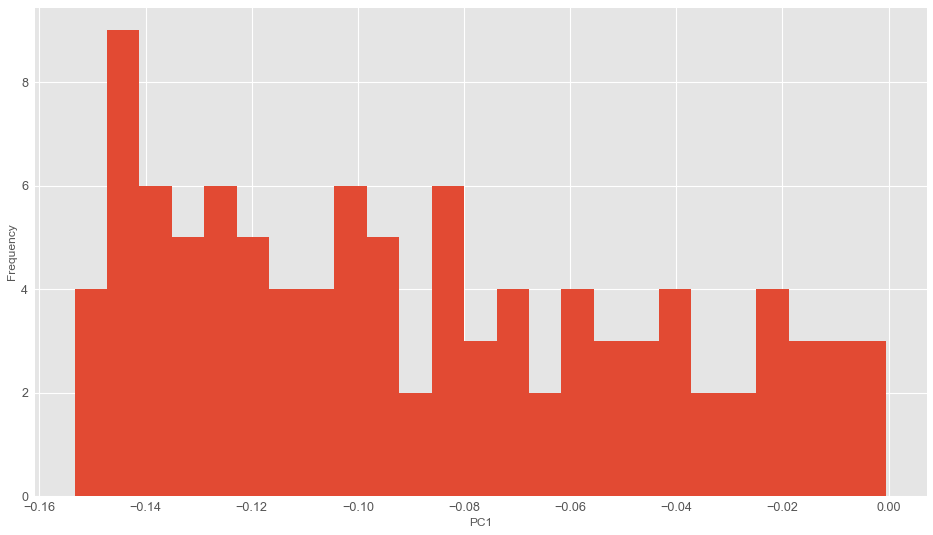

In [180]:
plt.figure(figsize = (16, 9))
plt.hist(Vh[0], bins = 25)
plt.xlabel('PC1')
plt.ylabel('Frequency')
plt.show()

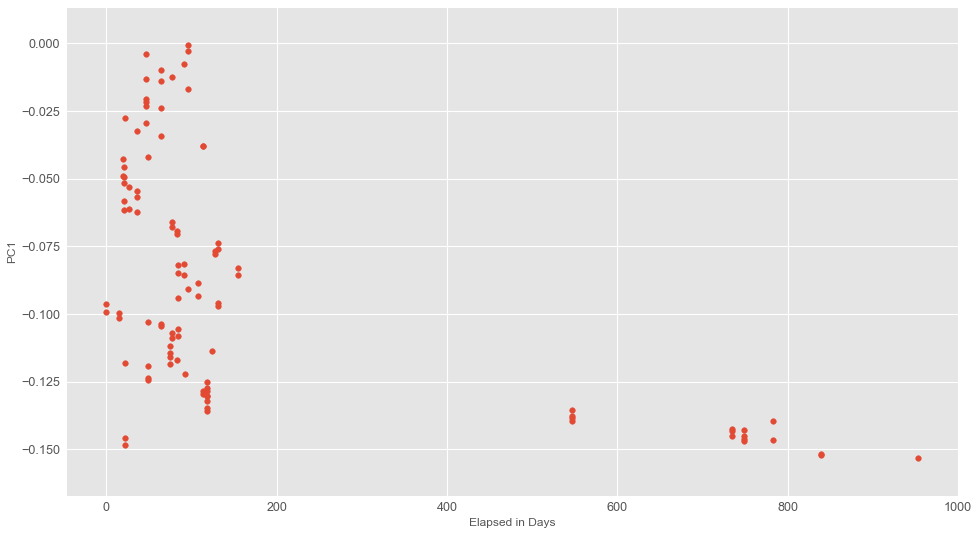

In [176]:
plt.figure(figsize = (16, 9))
plt.scatter(CEUsampleinfo.elapsedinDays, Vh[0])
plt.xlabel('Elapsed in Days')
plt.ylabel('PC1')
plt.show()


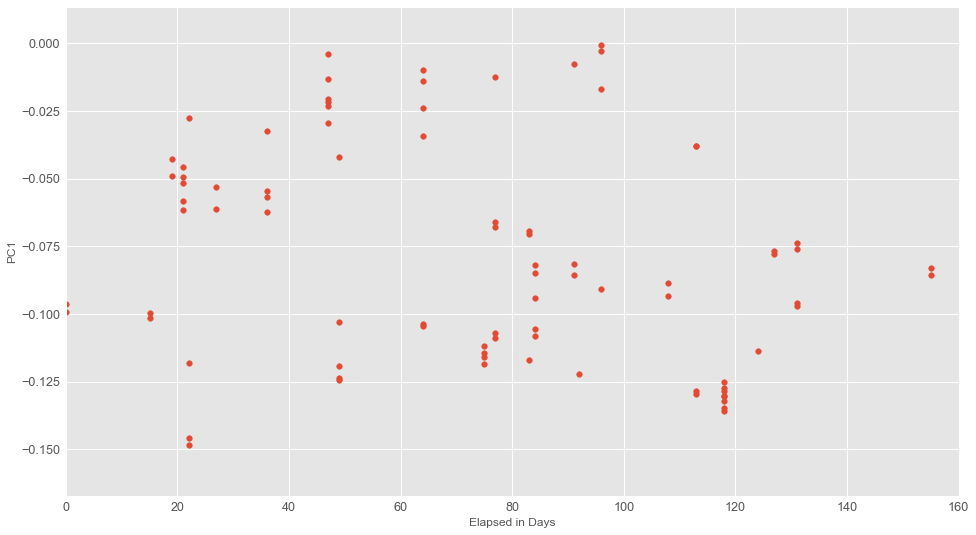

In [177]:
plt.figure(figsize = (16, 9))
plt.scatter(CEUsampleinfo.elapsedinDays, Vh[0])
plt.xlim(0, 160)
plt.xlabel('Elapsed in Days')
plt.ylabel('PC1')
plt.show()


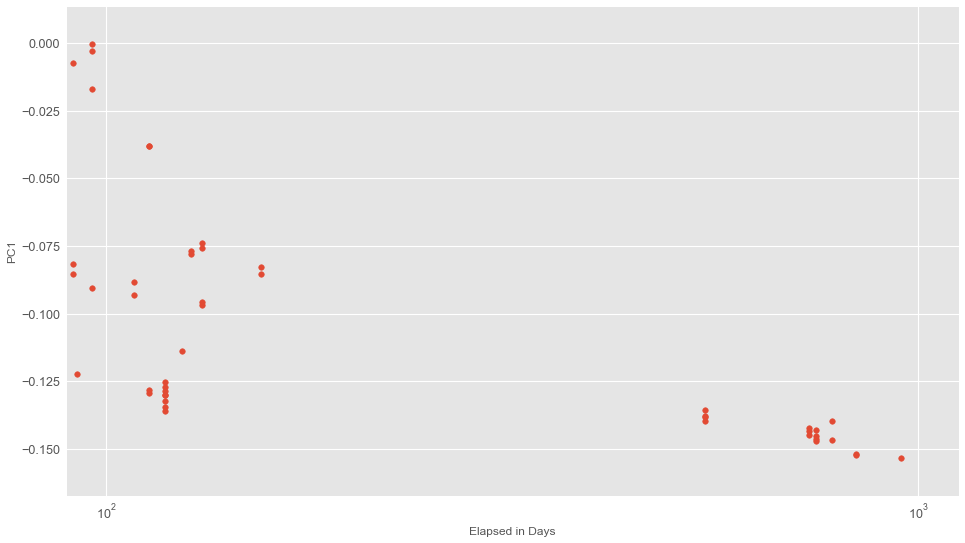

In [178]:
plt.figure(figsize = (16, 9))
plt.scatter(CEUsampleinfo.elapsedinDays, Vh[0])

plt.xscale('log', basex = 10)
plt.xlabel('Elapsed in Days')
plt.ylabel('PC1')
plt.show()


# Part 2

In [184]:
url_election = 'http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv'
election = pd.read_csv(url_election)

In [185]:
election.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [202]:
election.columns

Index(['Pollster', 'Start Date', 'End Date', 'Entry Date/Time (ET)',
       'Number of Observations', 'Population', 'Mode', 'Obama', 'Romney',
       'Undecided', 'Other', 'Pollster URL', 'Source URL', 'Partisan',
       'Affiliation', 'Question Text', 'Question Iteration'],
      dtype='object')

In [223]:
for c in ['Start Date', 'End Date', 'Entry Date/Time (ET)']:
    election[c] = pd.to_datetime(election[c])

In [327]:
nov_election = election[(election['Start Date']>=dt.datetime(2012, 11, 1)) & 
                        (election['Start Date']<=dt.datetime(2012, 11, 30) )]
nov_election.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Diff
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06 08:40:26+00:00,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.0
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26 15:31:23+00:00,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,2.0
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06 09:22:02+00:00,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.0
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06 08:51:48+00:00,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,1.0
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06 08:47:50+00:00,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-1.0


In [241]:
M = len(nov_election)
M

19

In [243]:
N = nov_election['Number of Observations'].median()
N

1200.0

In [349]:
0.53*1200

636.0

In [354]:
#BTD = [sum([np.random.random()<=0.53 for _ in range(int(N))])*1.0/N for _ in range(10**4)]
BTD = np.random.binomial(N, 0.53, size = 10**4)/N

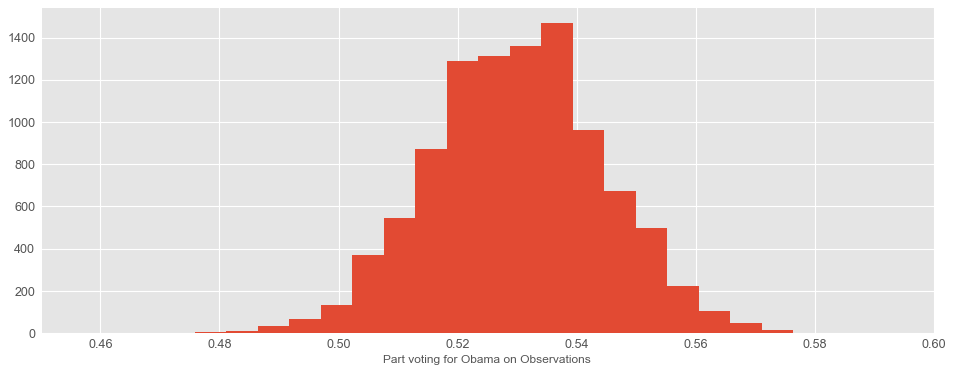

In [355]:
plt.figure(figsize =  (16, 6))
plt.xlim(0.45, 0.60)
plt.hist(BTD, bins = 20)
plt.xlabel('Part voting for Obama on Observations')
plt.show()

In [356]:
cw = sum([i>0.5 for i in BTD])*1.0/len(BTD)
cw

0.9809

In [291]:
def dist(L):
    mean = sum(L)*1.0/len(L)
    #print ('Mean =',mean)
    SE = (sum([(b-mean)**2 for b in L])/len(L))**0.5
    #print ('Standard Deviation =',SE)
    return SE

In [357]:
B_se = dist(BTD)
B_se

0.014411164374848108

In [276]:
APD = []
for _ in range(10**3):
    t = 0
    for _ in range(M):
        s = 0
        for _ in range(int(N)):
            s+= np.random.random()<=0.53
        t += s/N
    APD.append(t/M)

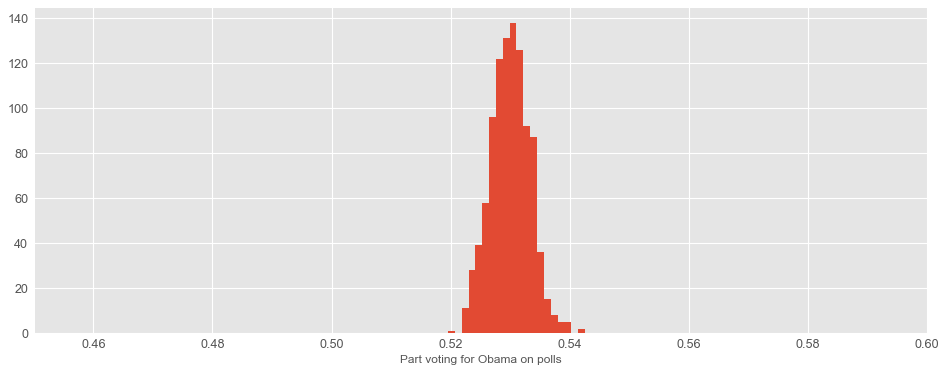

In [303]:
plt.figure(figsize =  (16, 6))
plt.xlim(0.45, 0.60)
plt.hist(APD, bins = 20)
plt.xlabel('Part voting for Obama on polls')
plt.show()

In [358]:
A_se = dist(APD)
A_se

0.003280130542964074

In [298]:
B_se/A_se

4.402025447702645

In [299]:
A_SE = []
for _ in range(10**3):
    P = []
    for _ in range(M):
        s = 0
        for _ in range(int(N)):
            s+= np.random.random()<=0.53
        P.append(s/N)
    A_SE.append(dist(P))
    #APD.append(t/M)

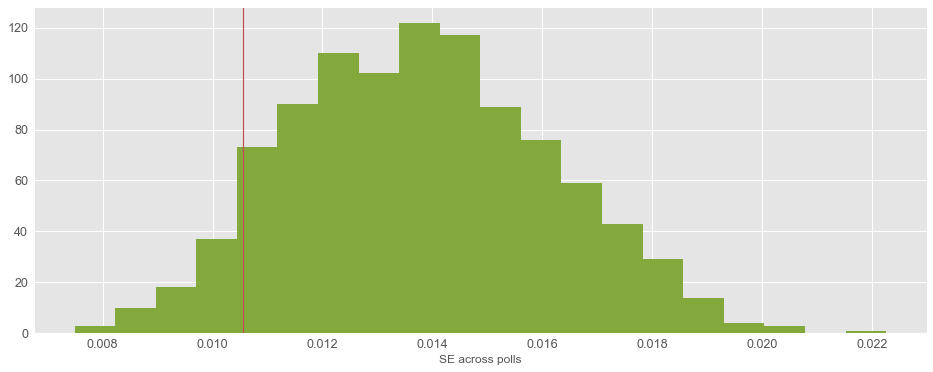

In [362]:
plt.figure(figsize =  (16, 6))
#plt.xlim(0.45, 0.60)
plt.hist(A_SE, bins = 20, color = 'g')
plt.axvline(R_se, color = 'r')
plt.xlabel('SE across polls')
plt.show()

In [312]:
R_se = dist(nov_election.Obama/100)
R_se

0.010552598766191284

In [360]:
R_se/sum(A_SE)*len(A_SE)

0.7641089938317311

In [368]:
np.mean([R_se<a for a in A_SE])

0.919

# Part 3

In [316]:
election['Diff'] = election.Obama - election.Romney
election.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Diff
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06 08:40:26+00:00,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.0
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26 15:31:23+00:00,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,2.0
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06 09:22:02+00:00,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.0
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06 08:51:48+00:00,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,1.0
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06 08:47:50+00:00,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-1.0


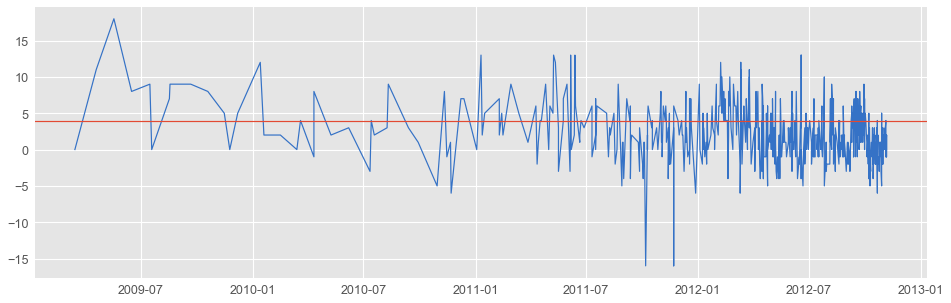

In [330]:
plt.figure(figsize =  (16, 5))
plt.plot(
    election['End Date'], 
    election.Diff,
    color = 'b'
)
plt.axhline(3.9)
plt.show()

In [331]:
poll_election = election.groupby('Pollster').mean()

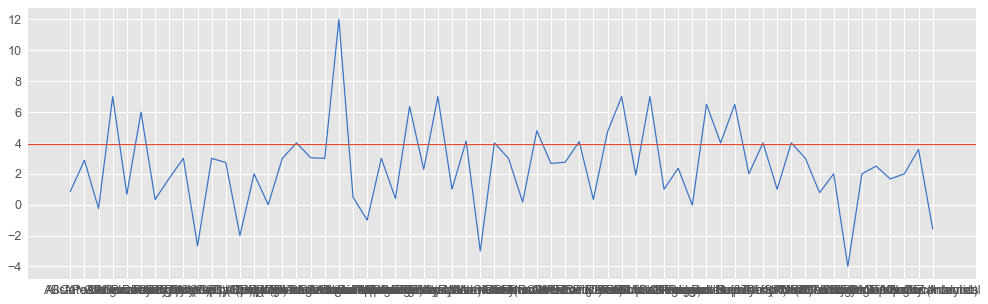

In [342]:
plt.figure(figsize =  (17, 5))
plt.plot(
    poll_election.index, 
    poll_election.Diff,
    color = 'b'
)
plt.axhline(3.9)
plt.show()

In [338]:
50+poll_election.Diff.mean()/2

51.263528128668014

# Part 4

In [345]:
url_str = "http://elections.huffingtonpost.com/pollster/api/charts/?topic=2014-senate"
import requests

In [346]:
election_urls = [election['url'] + '.csv' for election in requests.get(url_str).json()]
election_urls


ConnectionError: HTTPConnectionPool(host='elections.huffingtonpost.com', port=80): Max retries exceeded with url: /pollster/api/charts/?topic=2014-senate (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000029E818ADAC8>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [348]:
len(nov_election)

19